`pip install scipy matplotlib colorama plotly peakdetect`

In [1]:
import pandas 
import scipy.signal as scipy
from matplotlib import pyplot as plt
from datetime import datetime
from colorama import Fore
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from peakdetect import peakdetect
import statistics

Adding headings to important columns. It helps in the future, because `.csv` does not have headings

In [2]:
CSV_YEAR_COLUMN =   0
CSV_MONTH_COLUMN =  1
CSV_DATA_COLUMN =   3

Reading data from `csv` file

In [3]:
data = pandas.read_csv("dane.csv", sep=";", header=None)

Printing histogram

<AxesSubplot:title={'center':'Histogram for Monthly Mean Total Sunspot Number'}, xlabel='Monthly Mean Total Sunspot Number', ylabel='Frequency'>

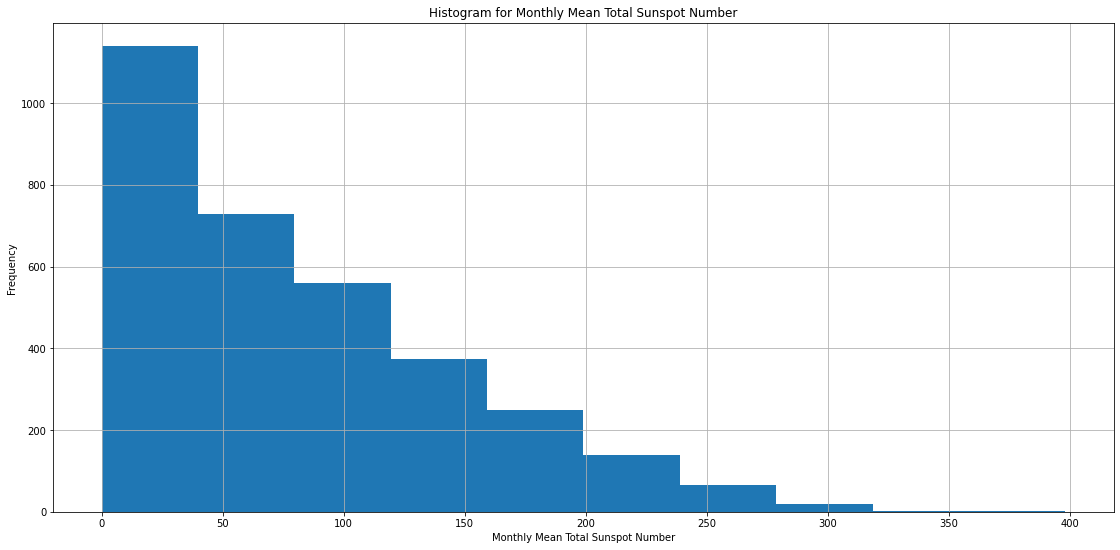

In [4]:
plt.figure(figsize=(19,9))
plt.ylabel("Frequency")
plt.title("Histogram for Monthly Mean Total Sunspot Number")
plt.xlabel("Monthly Mean Total Sunspot Number")
data[CSV_DATA_COLUMN].hist()

Printing plot

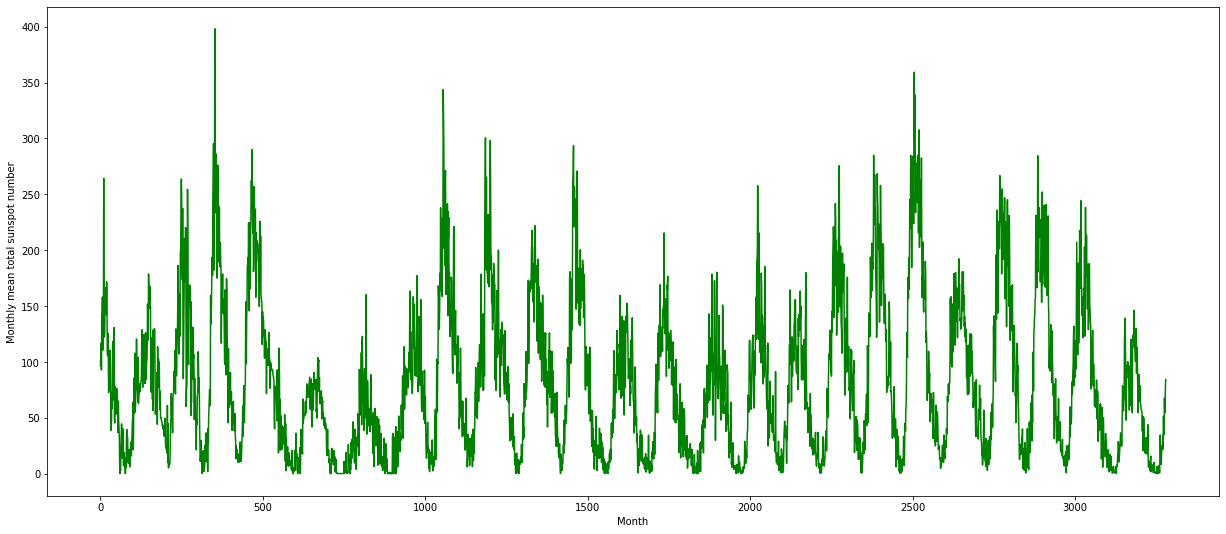

In [5]:
plt.figure(figsize=(21,9))
plt.ylabel("Monthly mean total sunspot number")
plt.xlabel("Month")
plt.plot(data[CSV_DATA_COLUMN], c="green")

<AxesSubplot:>

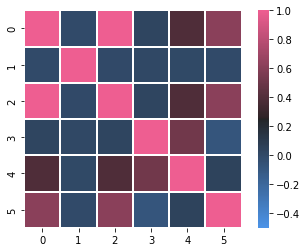

In [6]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5 , cmap=cmap, square=True, linewidths=.2)

finding minimum peaks

In [7]:
time_series = data[CSV_DATA_COLUMN].mul(-1.0)

indices = scipy.find_peaks(time_series, width=24, distance=34, prominence=30)[0]
time_series = data[CSV_DATA_COLUMN]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))


fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
    ),
    name='Detected Minimum'
))

fig.show()

finding maximum peaks

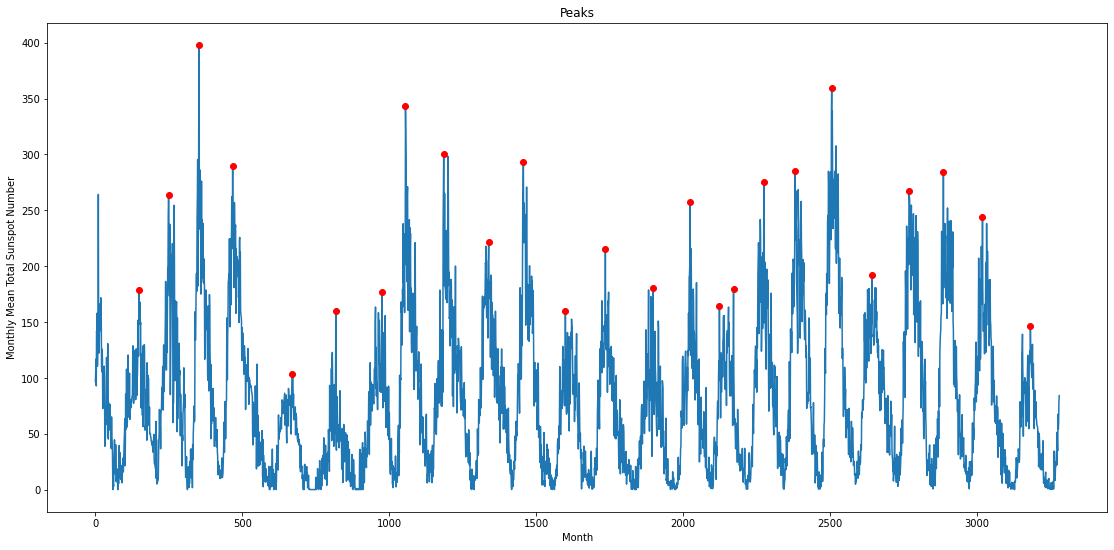

In [8]:
time_series = data[CSV_DATA_COLUMN]

peaks = peakdetect(time_series, lookahead=40) 

higherPeaks = np.array(peaks[0])
plt.figure(figsize=(19,9))
plt.ylabel("Monthly Mean Total Sunspot Number")
plt.xlabel("Month")
plt.title("Peaks")
plt.plot(time_series)
plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')

period = ~11 yrs = ~132 months

In [9]:
periodFirst = data[CSV_DATA_COLUMN][76:209]
periodSecond = data[CSV_DATA_COLUMN][209:313]
periodThird = data[CSV_DATA_COLUMN][313:424]
periodFourth = data[CSV_DATA_COLUMN][424:594]
periodFifth = data[CSV_DATA_COLUMN][593:707]

Describing all periods

In [10]:
pandas.DataFrame.describe(periodFirst)

count    133.000000
mean      70.796241
std       41.562821
min        0.000000
25%       40.000000
50%       67.000000
75%      100.300000
max      178.700000
Name: 3, dtype: float64

In [11]:
pandas.DataFrame.describe(periodSecond)

count    104.000000
mean     102.329808
std       63.607180
min        5.000000
25%       54.050000
50%       91.100000
75%      150.250000
max      263.700000
Name: 3, dtype: float64

In [12]:
pandas.DataFrame.describe(periodThird)

count    111.000000
mean     111.154955
std       87.516840
min        0.000000
25%       37.300000
50%       88.300000
75%      178.100000
max      398.200000
Name: 3, dtype: float64

In [13]:
pandas.DataFrame.describe(periodFourth)

count    170.000000
mean      99.337647
std       75.818168
min        0.000000
25%       30.775000
50%       87.750000
75%      154.700000
max      290.000000
Name: 3, dtype: float64

In [14]:
pandas.DataFrame.describe(periodFifth)

count    114.000000
mean      48.003509
std       29.014671
min        0.000000
25%       20.000000
50%       50.000000
75%       72.925000
max      103.800000
Name: 3, dtype: float64

Printing variance

In [15]:
output = statistics.variance(periodFirst)
print("Variance for 1st period: ", output)

output = statistics.variance(periodSecond)
print("Variance for 2nd period: ", output)

output = statistics.variance(periodThird)
print("Variance for 3rd period: ", output)

output = statistics.variance(periodFourth)
print("Variance for 4th period: ", output)

output = statistics.variance(periodFifth)
print("Variance for 4th period: ", output)



Variance for 1st period:  1727.4680918204601
Variance for 2nd period:  4045.8733747199403
Variance for 3rd period:  7659.197225225225
Variance for 4th period:  5748.394550643926
Variance for 4th period:  841.8511380220463


Drawing boxplots

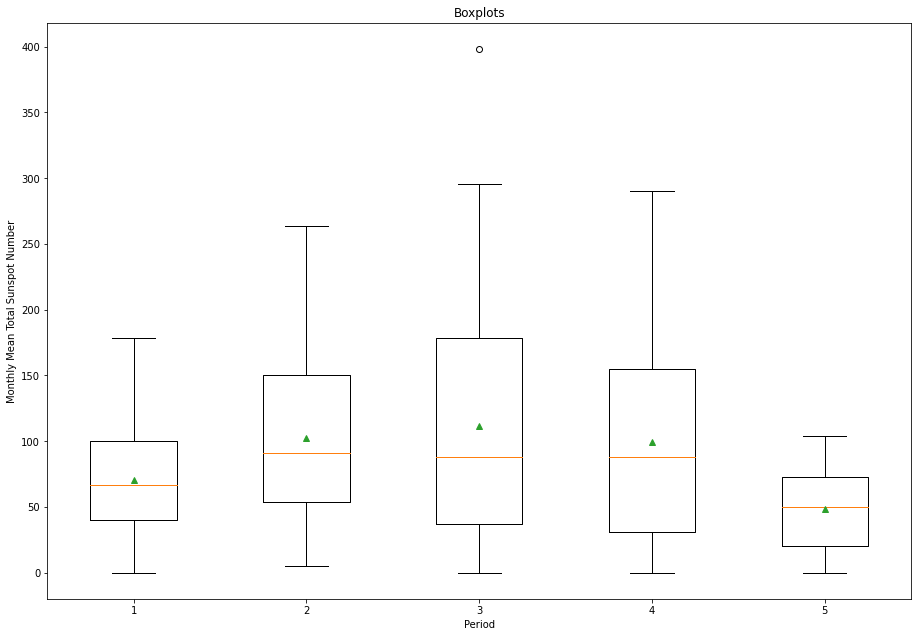

In [16]:
box_1 = periodFirst
box_2 = periodSecond
box_3 = periodThird
box_4 = periodFourth
box_5 = periodFifth

boxes = [box_1, box_2, box_3, box_4, box_5]

fig = plt.figure(figsize =(12, 8))
 
ax = fig.add_axes([0, 0, 1, 1])
plt.ylabel("Monthly Mean Total Sunspot Number")
plt.xlabel("Period")
plt.title("Boxplots")
bp = ax.boxplot(boxes, showmeans=True)
plt.show()

lag plot

<AxesSubplot:title={'center':'Lag plot'}, xlabel='y(t)', ylabel='y(t + 1)'>

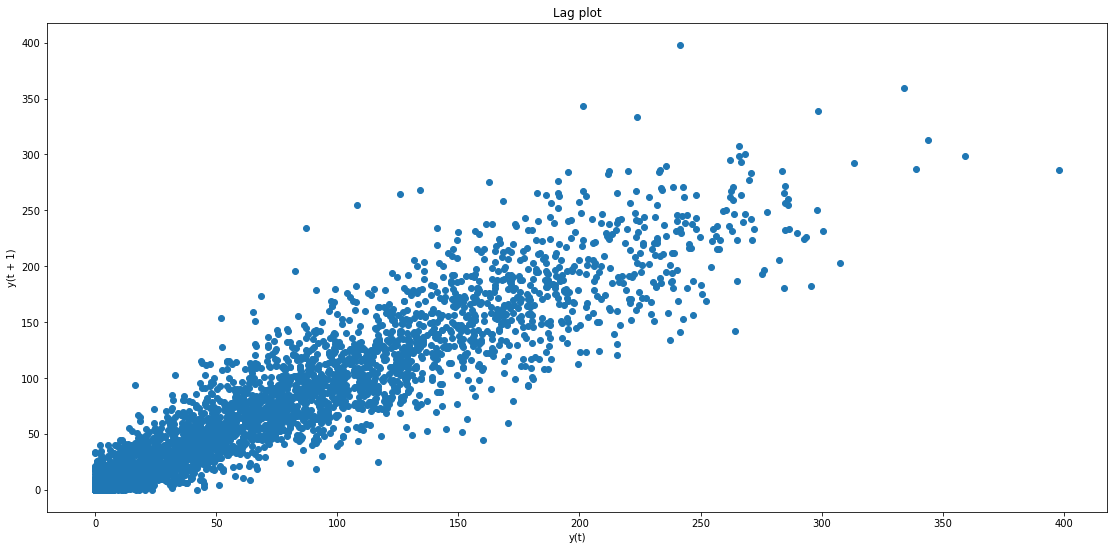

In [17]:
df = data[CSV_DATA_COLUMN]
plt.figure(figsize=(19,9))
plt.title("Lag plot")
pandas.plotting.lag_plot(df, lag=1)

Autocorrelation

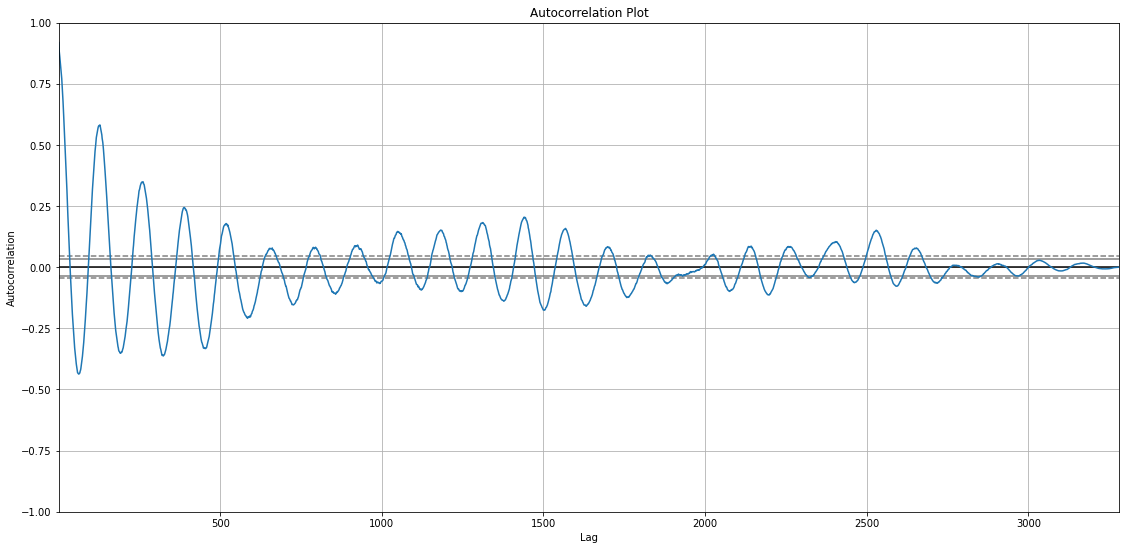

In [19]:
series = data[CSV_DATA_COLUMN]
plt.figure(figsize=(19,9))
pandas.plotting.autocorrelation_plot(series)
plt.title("Autocorrelation Plot")
plt.show()